In [1]:
# ---------------------------------------------------------------
# Notebook-friendly inspection of one RPlan sample
# ---------------------------------------------------------------
import json
from pathlib import Path

from rplan_data_coordtok import (
    RPlanDataset,
    TokenizationSchema,
    NameToIndex,
    IndexToName,
)

# Load dataset
schema   = TokenizationSchema()            # default 0.5-m grid, 256-m canvas
dataset  = RPlanDataset(root_dir="dataset", tokenizer=schema)

idx   = 0      # ← change this to inspect another plan
head  = 80     # ← how many tokens to print

sample = dataset[idx]

# ---------------------------------------------------------------
# Helper for human-readable tokens
# ---------------------------------------------------------------
def pretty_token(tok: int) -> str:
    if tok == schema.BOS_TOKEN:
        return "<BOS>"
    if tok == schema.EOS_TOKEN:
        return "<EOS>"
    if tok == schema.PAD_TOKEN:
        return "<PAD>"
    if tok >= schema.NAME_START_INDEX:
        cls_idx = tok - schema.NAME_START_INDEX
        return f"<NAME:{IndexToName[cls_idx]}>"
    x, y = schema.token_to_point(tok)
    return f"<{x},{y}>"

# ---------------------------------------------------------------
# 1) Caption (natural-language prompt)
# ---------------------------------------------------------------
print("──────── CAPTION ────────")
print(sample["caption"])
print()

# ---------------------------------------------------------------
# 2) Raw IDs & pretty tokens (head)
# ---------------------------------------------------------------
ids = sample["input_ids"].tolist()

print("──────── RAW TOKEN IDs (head) ────────")
print(ids[: head])
print()

print("──────── PRETTY TOKENS (head) ────────")
print([pretty_token(t) for t in ids[: head]])
print()

# ---------------------------------------------------------------
# 3) Room-by-room breakdown
# ---------------------------------------------------------------
print("──────── ROOM-BY-ROOM SUMMARY ────────")
current_pts = []
room_counter = 0
for tok in ids:
    if tok in (schema.BOS_TOKEN, schema.PAD_TOKEN):
        continue
    if tok == schema.EOS_TOKEN:
        break
    if tok >= schema.NAME_START_INDEX:
        room_counter += 1
        cls_idx   = tok - schema.NAME_START_INDEX
        room_name = IndexToName[cls_idx]
        print(f"Room {room_counter:02d}: {room_name:12}  "
              f"{len(current_pts)} point-tokens")
        current_pts = []             # reset for next room
    else:
        current_pts.append(tok)

──────── CAPTION ────────
The floorplan contains 6 rooms. 1 living room 1 kitchen 2 bedrooms 1 bathroom 1 balcony

──────── RAW TOKEN IDs (head) ────────
[262144, 162952, 228488, 228600, 163064, 262150, 130696, 163464, 163543, 130775, 262151, 24864, 53024, 53030, 53543, 89383, 89894, 89855, 130303, 131326, 131287, 163031, 163062, 164087, 208631, 208758, 86390, 86352, 85326, 24910, 262148, 86152, 131208, 131327, 90367, 90336, 89311, 86239, 262150, 52959, 90335, 90407, 53031, 262149, 208632, 236792, 236918, 208758, 262152, 262145, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146, 262146]

──────── PRETTY TOKENS (head) ────────
['<BOS>', '<136,318>', '<136,446>', '<248,446>', '<248,318>', '<NAME:BEDROOM>', '<136,255>', '<136,319>', '<215,319>', '<215,255>', '<NAME:BATHROOM>', '<288,48>', '<288,103>', '<294,103

Visualizing 1 randomly selected files from encoded


TypeError: list indices must be integers or slices, not tuple

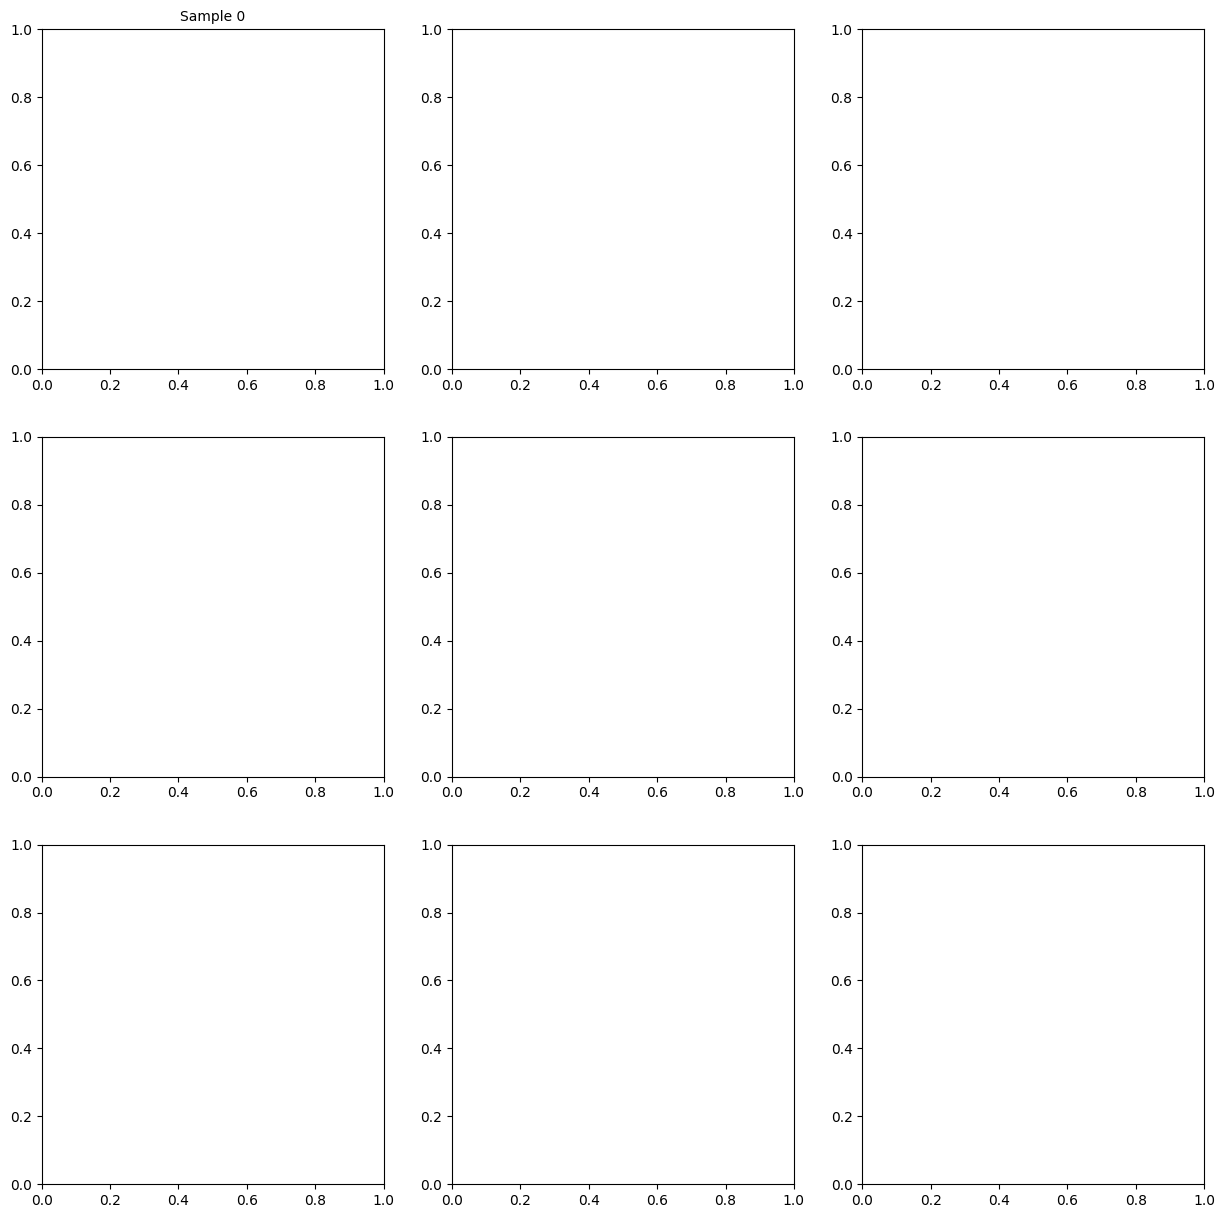

In [1]:
from rplan_data_coordtok import RPlanDataset
from visualize import visualize_floorplan

# 1) create DLLM-ready encoded JSONs
ds = RPlanDataset("dataset")
encoded = {
    "caption": ds[0]["caption"],
    "input_ids": ds[0]["input_ids"].tolist()
}
import json, pathlib
pathlib.Path("encoded").mkdir(exist_ok=True)
with open("encoded/0.json", "w") as fp: json.dump(encoded, fp)

# 2) visualise
visualize_floorplan("encoded")   # works on encoded
visualize_floorplan("dataset")   # still works on raw